In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az 
from cmdstanpy import CmdStanModel
from statsmodels.nonparametric.smoothers_lowess import lowess

## Data preperation

In [2]:
weather = pd.read_csv('weather.csv')
smog_relation = pd.read_excel('smog_weather_data.xlsx')

In [3]:
smog_relation.head()

,datetime,temp,humidity,windspeed,winddir,precipprob,sealevelpressure,heating sezon,weekend,smog Złoty Róg,smog Bulwarowa,smog Swoszowice
0,2022-01-01,9.8,93.3,25.1,246.6,1,1020.3,1,1,16.2,NaN,17.4
1,2022-01-02,8.5,89.1,26.8,228.9,1,1018.0,1,1,24.9,21.5,16.9
2,2022-01-03,8.8,72.0,37.5,239.8,1,1009.2,1,0,11.7,12.5,10.0
3,2022-01-04,7.9,82.8,24.4,214.1,1,1000.3,1,0,7.5,10.4,6.4
4,2022-01-05,5.0,90.0,28.7,244.6,1,1000.1,1,0,10.3,12.2,9.8


In [4]:
cols_to_drop = weather.columns[-5:]
weather = weather.drop(columns=cols_to_drop).set_index('datetime')
smog_relation = smog_relation.set_index('datetime')
weather.index = pd.to_datetime(weather.index)
smog_relation.index = pd.to_datetime(smog_relation.index, format='mixed')

In [5]:
# Bronowice
data_1 = pd.merge(weather, smog_relation, left_index=True, right_index=True).rename(columns={'smog Złoty Róg': 'smog'}).drop(columns=['name', 'preciptype','sunrise', 'sunset'])

In [6]:
# Nowa Huta
data_2 = pd.merge(weather, smog_relation, left_index=True, right_index=True).rename(columns={'smog Bulwarowa': 'smog'}).drop(columns=['name', 'preciptype','sunrise', 'sunset'])

In [7]:
# Swoszowice
data_3 = pd.merge(weather, smog_relation, left_index=True, right_index=True).rename(columns={'smog Swoszowice': 'smog'}).drop(columns=['name', 'preciptype','sunrise', 'sunset'])

## Data visualization

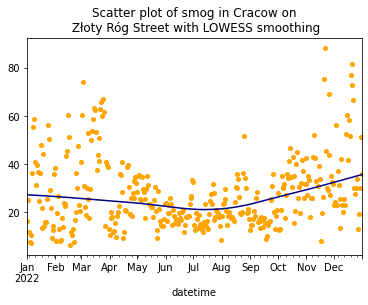

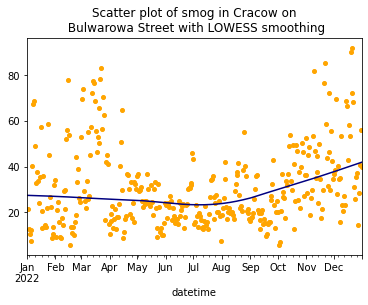

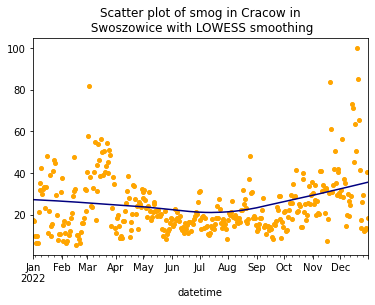

In [8]:
data_1.smog.plot(style='.', markersize=8, color='orange')
smoothed = lowess(data_1.smog.values, data_1.smog.index)
plt.plot(smoothed[:, 0].astype('datetime64[ns]'), smoothed[:, 1], color='navy')
plt.title('Scatter plot of smog in Cracow on\n Złoty Róg Street with LOWESS smoothing')
plt.show()

data_2.smog.plot(style='.', markersize=8, color='orange')
smoothed = lowess(data_2.smog.values, data_2.smog.index)
plt.plot(smoothed[:, 0].astype('datetime64[ns]'), smoothed[:, 1], color='navy')
plt.title('Scatter plot of smog in Cracow on\n Bulwarowa Street with LOWESS smoothing')
plt.show()

data_3.smog.plot(style='.', markersize=8, color='orange')
smoothed = lowess(data_1.smog.values, data_1.smog.index)
plt.plot(smoothed[:, 0].astype('datetime64[ns]'), smoothed[:, 1], color='navy')
plt.title('Scatter plot of smog in Cracow in\n Swoszowice with LOWESS smoothing')
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


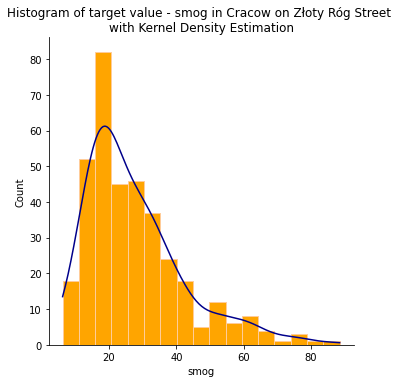

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


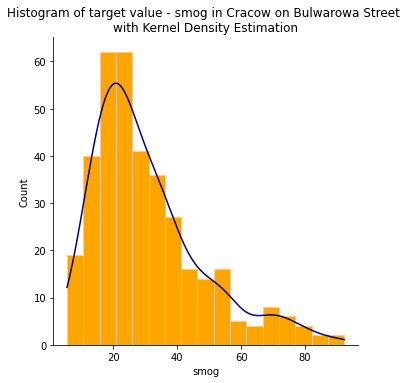

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


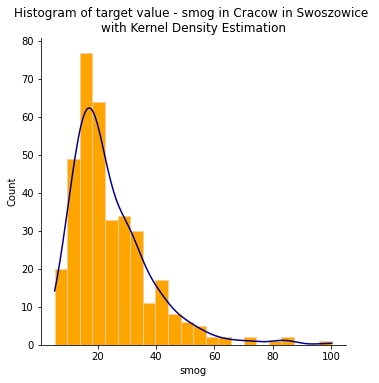

In [9]:
sns.displot(data_1['smog'], kde=True, color='darkblue', facecolor='orange', edgecolor="#ffcc99")
plt.title('Histogram of target value - smog in Cracow on Złoty Róg Street \nwith Kernel Density Estimation')
plt.show()

sns.displot(data_2['smog'], kde=True, color='darkblue', facecolor='orange', edgecolor="#ffcc99")
plt.title('Histogram of target value - smog in Cracow on Bulwarowa Street \nwith Kernel Density Estimation')
plt.show()

sns.displot(data_3['smog'], kde=True, color='darkblue', facecolor='orange', edgecolor="#ffcc99")
plt.title('Histogram of target value - smog in Cracow in Swoszowice \nwith Kernel Density Estimation')
plt.show()

## Differrence data

In [10]:
smog_relation.describe()

,temp,humidity,windspeed,winddir,precipprob,sealevelpressure,heating sezon,weekend,smog Złoty Róg,smog Bulwarowa,smog Swoszowice
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,363.000000,364.000000,364.000000
mean,9.784110,75.118356,20.598356,177.084384,0.676712,1017.904932,0.624658,0.145205,27.579063,30.665934,24.464011
std,7.957246,13.351763,8.217480,102.871982,0.468374,8.131500,0.484876,0.352791,14.609631,17.128022,13.795016
min,-9.900000,43.200000,3.800000,8.100000,0.000000,995.500000,0.000000,0.000000,6.200000,5.500000,5.300000
25%,2.900000,64.800000,14.300000,50.700000,0.000000,1012.800000,0.000000,0.000000,17.300000,18.400000,15.075000
50%,9.900000,77.400000,19.000000,228.900000,1.000000,1018.300000,1.000000,0.000000,23.800000,25.600000,20.500000
75%,16.100000,86.000000,24.900000,253.400000,1.000000,1022.600000,1.000000,0.000000,34.600000,37.525000,30.825000
max,27.500000,97.600000,54.700000,354.800000,1.000000,1042.500000,1.000000,1.000000,88.500000,92.200000,100.300000


In [11]:
smog_relation['pressure_diff'] = smog_relation['sealevelpressure'] - smog_relation['sealevelpressure'].mean()

In [12]:
smog_relation['pressure_diff'].describe()

count    3.650000e+02
mean     4.858944e-14
std      8.131500e+00
min     -2.240493e+01
25%     -5.104932e+00
50%      3.950685e-01
75%      4.695068e+00
max      2.459507e+01
Name: pressure_diff, dtype: float64

## Pressure's influence on windspeed

In [13]:
wind_speed_ppc = CmdStanModel(stan_file='./wind_speed_ppc.stan')

In [14]:
wind_ppc = wind_speed_ppc.sample(iter_warmup=1000, iter_sampling=1000, seed=6072023)
wind_ppc.summary()

10:31:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:17 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,20.007600,0.015739,1.00751,18.33730,19.999300,21.65790,4097.76,292697.0,0.999359
beta,-0.001337,0.015979,1.00705,-1.63979,-0.000185,1.65189,3971.75,283696.0,0.999984
sigma,10.016700,0.016250,0.99792,8.35568,10.022800,11.62200,3771.28,269377.0,1.000410
pressure_diff,0.237668,0.160250,10.35120,-16.69680,0.178100,17.08040,4172.44,298031.0,0.999458
wind_speed,19.816200,0.229669,14.51000,-3.50632,19.874500,43.19740,3991.45,285103.0,0.999351


In [15]:
wind_ppc_data = wind_ppc.draws_pd()

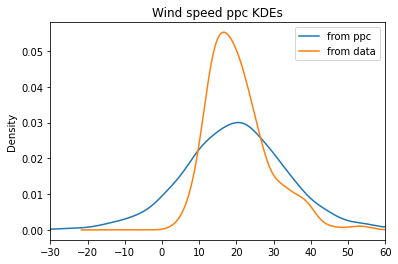

In [16]:
wind_ppc_data.wind_speed.plot.kde(label='from ppc')
smog_relation.windspeed.plot.kde(label='from data')
plt.xlim(-30, 60)
plt.legend()
plt.title("Wind speed ppc KDEs")
plt.show()

In [17]:
smog_relation.windspeed.values.shape

(365,)

In [18]:
smog_relation.dropna(inplace=True)

In [19]:
pressure = smog_relation["pressure_diff"].values
windspeed = smog_relation["windspeed"].values

In [20]:
smog_relation["smog Bulwarowa"].describe()

count    361.000000
mean      30.655956
std       17.154645
min        5.500000
25%       18.400000
50%       25.500000
75%       37.200000
max       92.200000
Name: smog Bulwarowa, dtype: float64

In [21]:
wind_speed_fit = CmdStanModel(stan_file='./wind_speed_fit.stan')

In [22]:
data = {
    'N': len(pressure),
    'pressure': pressure,
    'wind_speed': windspeed
}

fit = wind_speed_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit.summary())

10:31:18 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:19 - cmdstanpy - INFO - CmdStan done processing.
10:31:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/DA_project/wind_speed_fit.stan', line 21, column 2 to column 54)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/DA_project/wind_speed_fit.stan', line 21, column 2 to column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/DA_project/wind_speed_fit.stan', line 21, column 2 to column 54)
Consider re-running with show_console=True if the above output is unclear!



                           Mean      MCSE    StdDev          5%         50%  \
lp__                -929.307000  0.078870  1.119030 -931.594000 -929.043000   
alpha                 20.553400  0.041411  0.336413   20.030100   20.573900   
beta                  -0.257684  0.003344  0.054279   -0.348352   -0.256685   
sigma                  8.166610  0.013567  0.295654    7.704150    8.163250   
wind_speed_hat[1]     20.037800  0.380637  8.622190    7.204530   20.059600   
...                         ...       ...       ...         ...         ...   
wind_speed_hat[357]   19.664500  0.406109  8.637260    3.793130   19.807600   
wind_speed_hat[358]   18.793200  0.356874  7.647270    6.723420   18.524700   
wind_speed_hat[359]   21.369200  0.418194  8.293010    7.480730   21.101800   
wind_speed_hat[360]   21.221500  0.420785  8.423740    6.524130   21.201200   
wind_speed_hat[361]   20.639300  0.439378  8.358780    7.196340   20.572900   

                            95%     N_Eff   N_Eff/

In [23]:
wind_fit_data = fit.draws_pd()

In [24]:
wind_fit_df = pd.DataFrame(wind_fit_data.loc[:, 'wind_speed_hat[1]':f'wind_speed_hat[{len(pressure)}]'].values.flatten())
wind_fit_df.columns = ["windspeed"]
wind_fit_df.head()

,windspeed
0,22.8942
1,21.9897
2,32.9990
3,13.0050
4,27.8444


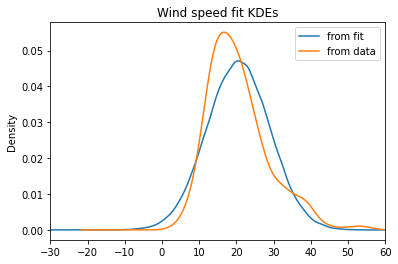

In [25]:
wind_fit_df.windspeed.plot.kde(label='from fit')
smog_relation.windspeed.plot.kde(label='from data')
plt.xlim(-30, 60)
plt.legend()
plt.title("Wind speed fit KDEs")
plt.show()

## Smog models Złoty Róg Street

In [26]:
df_zr = smog_relation[["temp", "windspeed", "precipprob", "heating sezon", "weekend",  "smog Złoty Róg", "sealevelpressure"]]

<Axes: xlabel='precipprob', ylabel='smog Złoty Róg'>

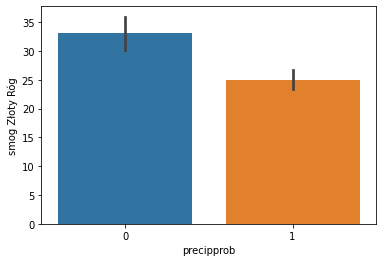

In [27]:
sns.barplot(data=df_zr, x="precipprob", y="smog Złoty Róg")

In [28]:
precip_influence = df_zr[df_zr.precipprob == 1]["smog Złoty Róg"].mean() - df_zr[df_zr.precipprob == 0]["smog Złoty Róg"].mean()
precip_influence

-8.115135911447393

<Axes: xlabel='heating sezon', ylabel='smog Złoty Róg'>

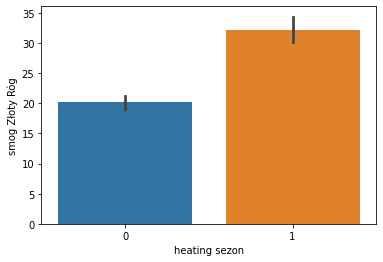

In [29]:
sns.barplot(data=df_zr, x="heating sezon", y="smog Złoty Róg")

In [30]:
sezon_influence = df_zr[df_zr["heating sezon"] == 1]["smog Złoty Róg"].mean() - df_zr[df_zr["heating sezon"] == 0]["smog Złoty Róg"].mean()
sezon_influence

12.060277777777781

<Axes: xlabel='weekend', ylabel='smog Złoty Róg'>

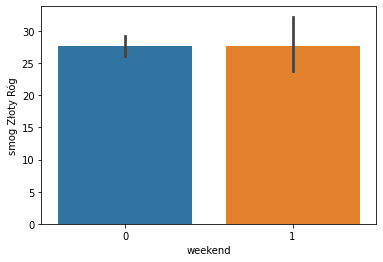

In [31]:
sns.barplot(data=df_zr, x="weekend", y="smog Złoty Róg")

In [32]:
weekend_influence = df_zr[df_zr["weekend"] == 1]["smog Złoty Róg"].mean() - df_zr[df_zr["weekend"] == 0]["smog Złoty Róg"].mean()
weekend_influence

0.0960853871048073

In [33]:
smog_zr_ppc = CmdStanModel(stan_file='./smog_zr_ppc.stan')

In [34]:
smog_zr_ppc_samples = smog_zr_ppc.sample(iter_warmup=1000, iter_sampling=1000, seed=9072023)
smog_zr_ppc_samples.summary()

10:31:21 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:22 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,30.004900,0.031647,2.002290,26.81090,29.953900,33.29720,4003.04,166793.0,1.000450
beta_temp,0.007404,0.015887,1.013040,-1.66837,0.020577,1.65770,4065.99,169416.0,0.999368
beta_ws,-0.013674,0.016325,0.998415,-1.67244,-0.011212,1.59987,3740.50,155854.0,0.999807
d_pp,-9.011190,0.015904,0.983482,-10.61610,-9.006210,-7.40807,3824.21,159342.0,0.999644
d_hs,13.025500,0.017144,1.017910,11.34250,13.026100,14.70180,3525.23,146884.0,1.000080
d_wn,0.972134,0.031853,2.008530,-2.34917,1.040390,4.17954,3976.11,165671.0,0.999643
sigma,15.004900,0.015557,0.994045,13.41210,14.991900,16.66550,4082.86,170119.0,1.000630
windspeed,20.213900,0.156797,9.919030,4.09917,20.157800,36.64960,4001.88,166745.0,0.999583
precipprob,0.686250,0.007393,0.464074,0.00000,1.000000,1.00000,3940.80,164200.0,0.999553
heating_sezon,0.615750,0.007587,0.486478,0.00000,1.000000,1.00000,4110.90,171288.0,1.001750


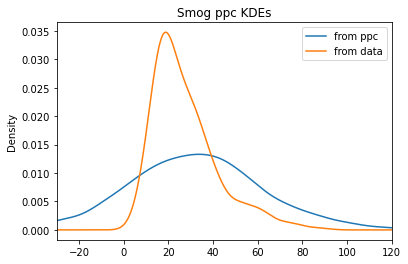

In [35]:
# Prior normal distribution
smog_zr_ppc_samples.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-30, 120)
plt.legend()
plt.title("Smog ppc KDEs")
plt.show()

In [36]:
smog_zr_ppc_s = CmdStanModel(stan_file='./smog_zr_ppc_s.stan')

In [37]:
smog_zr_ppc_s_samples = smog_zr_ppc_s.sample(iter_warmup=1000, iter_sampling=1000, seed=9072023)
smog_zr_ppc_s_samples.summary()

10:31:22 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:22 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,29.962500,0.032824,2.008010,26.60270,29.966500,33.26550,3742.49,143942.0,0.999909
beta_temp,-0.018414,0.017004,1.026950,-1.74491,-0.004029,1.64825,3647.35,140283.0,1.000240
beta_ws,0.019357,0.015647,1.013070,-1.64880,0.041431,1.67563,4191.78,161222.0,0.999810
d_pp,-8.998050,0.016520,1.024280,-10.74780,-8.984160,-7.30414,3844.30,147858.0,1.000040
d_hs,13.012500,0.016300,0.999530,11.38800,12.996800,14.64660,3760.47,144633.0,1.001020
d_wn,1.012330,0.031670,1.967600,-2.22677,1.003850,4.27255,3859.99,148461.0,0.999874
sigma,15.006800,0.015875,0.994030,13.36450,15.005200,16.64570,3920.63,150794.0,1.000520
windspeed,20.078100,0.172219,9.993360,3.61903,19.982200,36.24530,3367.13,129505.0,0.999967
precipprob,0.668500,0.007542,0.470811,0.00000,1.000000,1.00000,3896.75,149875.0,1.000320
heating_sezon,0.618750,0.007749,0.485754,0.00000,1.000000,1.00000,3929.80,151146.0,1.000450


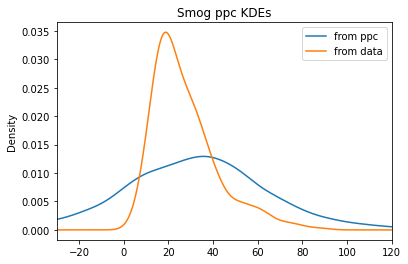

In [38]:
# Prior t_student distribution
smog_zr_ppc_s_samples.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-30, 120)
plt.legend()
plt.title("Smog ppc KDEs")
plt.show()

In [39]:
smog_ws_zr_fit = CmdStanModel(stan_file='./smog_ws_zr_fit.stan')

In [40]:
smog_zr_fit = CmdStanModel(stan_file='./smog_zr_fit.stan')

In [41]:
smog_ws_zr_fit_s = CmdStanModel(stan_file='./smog_ws_zr_fit_s.stan')

In [42]:
smog_zr_fit_s = CmdStanModel(stan_file='./smog_zr_fit_s.stan')

In [43]:
data = {
    'N': len(df_zr),
    'precipprob': df_zr.precipprob.values,
    'pressure': df_zr.sealevelpressure.values,
    'temp': df_zr.temp.values,
    'weekend': df_zr.weekend.values,
    'heating_sezon': df_zr['heating sezon'].values,
    'smog': df_zr['smog Złoty Róg'].values
}

fit_ws_zr = smog_ws_zr_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=9072023)

print(fit_ws_zr.summary())

10:31:24 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:25 - cmdstanpy - INFO - CmdStan done processing.
10:31:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is -1.70427, but must be positive! (in '/home/DA_project/smog_ws_zr_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.601857, but must be positive! (in '/home/DA_project/smog_ws_zr_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.617113, but must be positive! (in '/home/DA_project/smog_ws_zr_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.857282, but must be positive! (in '/home/DA_project/smog_ws_zr_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -1.65898, but must be positive! (in '/home/DA_project/smog_ws_zr_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -1.50111, but must be positive! (in '/home/DA_project/smog_ws_zr_fit.stan


                     Mean        MCSE       StdDev           5%          50%  \
lp__         -3027.770000  768.263000  2403.390000 -9567.730000 -1992.780000   
alpha            0.222576    0.658745     0.947480    -1.176450     0.351817   
beta_temp        0.650060    0.519112     0.804314    -0.769324     1.206890   
beta_ws          0.253369    0.251317     0.363827    -0.254848     0.293176   
d_pp             0.217412    0.956258     1.373410    -1.939800     1.375880   
...                   ...         ...          ...          ...          ...   
log_lik[357]    -4.257450    0.490121     1.134890    -7.614410    -4.032030   
log_lik[358]    -5.180740    0.521556     1.812160   -10.020400    -4.420670   
log_lik[359]    -7.133770    1.324580     4.749660   -18.916000    -4.940170   
log_lik[360]   -14.618300    4.399980    15.739800   -52.536100    -6.443390   
log_lik[361]    -8.153570    1.944730     6.731900   -26.517400    -5.218960   

                      95%     N_Eff  N

In [44]:
data = {
    'N': len(df_zr),
    'precipprob': df_zr.precipprob.values,
    'wind_speed': df_zr.windspeed.values,
    'temp': df_zr.temp.values,
    'weekend': df_zr.weekend.values,
    'heating_sezon': df_zr['heating sezon'].values,
    'smog': df_zr['smog Złoty Róg'].values
}

fit_zr = smog_zr_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=9072023)

print(fit_zr.summary())

10:31:25 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:26 - cmdstanpy - INFO - CmdStan done processing.



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1076.940000  0.109076  1.668000 -1079.870000 -1076.600000   
alpha           34.899900  0.095397  1.372620    32.621100    34.953400   
beta_temp       -0.040447  0.004625  0.079429    -0.163917    -0.041417   
beta_ws         -0.514140  0.003749  0.066348    -0.628531    -0.519427   
d_pp            -7.579990  0.043440  0.796102    -8.949540    -7.545410   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.646870  0.004065  0.077738    -3.780090    -3.643640   
log_lik[358]    -3.908240  0.004686  0.071465    -4.029270    -3.904100   
log_lik[359]    -3.723850  0.003571  0.055265    -3.817900    -3.725040   
log_lik[360]    -4.302100  0.006813  0.110449    -4.480680    -4.306510   
log_lik[361]    -3.490990  0.002989  0.049999    -3.576720    -3.487880   

                      95%    N_Eff  N_Eff/s     R_hat  
lp__         -1074.570000  233.849  128.06

In [45]:
data = {
    'N': len(df_zr),
    'precipprob': df_zr.precipprob.values,
    'pressure': df_zr.sealevelpressure.values,
    'temp': df_zr.temp.values,
    'weekend': df_zr.weekend.values,
    'heating_sezon': df_zr['heating sezon'].values,
    'smog': df_zr['smog Złoty Róg'].values
}

fit_ws_zr_s = smog_ws_zr_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_ws_zr_s.summary())

10:31:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:30 - cmdstanpy - INFO - CmdStan done processing.
10:31:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_ws_zr_fit_s.stan', line 46, column 2 to column 33)
	Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_ws_zr_fit_s.stan', line 46, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_ws_zr_fit_s.stan', line 46, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_ws_zr_fit_s.stan', line 46, column 2 to column 33)
	Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_ws_zr_fit_s.stan', line 46, column 2 to column 33)
Exception: normal_lpdf: Scale parameter is -1.24568, but must be positive! (in '/home/D


                    Mean        MCSE      StdDev          5%         50%  \
lp__         -571.787000  166.779000  239.481000 -864.660000 -520.176000   
alpha           0.574709    1.004530    1.442420   -1.744470    1.772920   
beta_temp       0.862731    0.326991    0.469531    0.159269    1.133540   
beta_ws         0.457685    0.842040    1.209100   -0.840885    0.761895   
d_pp           -0.161232    0.552489    0.793328   -1.398140   -0.019806   
...                  ...         ...         ...         ...         ...   
log_lik[357]   -3.953970    0.397972    0.571455   -4.858920   -3.753980   
log_lik[358]   -6.541930    1.788060    2.567500  -10.110300   -4.460570   
log_lik[359]   -8.263520    2.063960    2.963680  -12.096700   -5.785990   
log_lik[360]  -11.490800    2.566670    3.685520  -16.269100   -8.198960   
log_lik[361]   -8.785590    2.099770    3.015090  -12.746700   -6.241630   

                     95%    N_Eff  N_Eff/s      R_hat  
lp__         -215.119000  2.06

In [46]:
data = {
    'N': len(df_zr),
    'precipprob': df_zr.precipprob.values,
    'wind_speed': df_zr.windspeed.values,
    'temp': df_zr.temp.values,
    'weekend': df_zr.weekend.values,
    'heating_sezon': df_zr['heating sezon'].values,
    'smog': df_zr['smog Złoty Róg'].values
}

fit_zr_s = smog_zr_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_zr_s.summary())

10:31:30 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:31 - cmdstanpy - INFO - CmdStan done processing.



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1077.280000  0.162318  2.080730 -1080.920000 -1076.990000   
alpha           35.123300  0.127981  1.537650    32.534000    34.963000   
beta_temp       -0.040248  0.005192  0.088522    -0.187287    -0.038492   
beta_ws         -0.523319  0.004876  0.069384    -0.637071    -0.523160   
d_pp            -7.627900  0.043718  0.831625    -8.939040    -7.582580   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.713910  0.005069  0.090218    -3.871450    -3.700050   
log_lik[358]    -4.002610  0.003888  0.074512    -4.130650    -3.998000   
log_lik[359]    -3.813910  0.003858  0.064421    -3.923280    -3.813470   
log_lik[360]    -4.373720  0.005659  0.101873    -4.545520    -4.377720   
log_lik[361]    -3.546150  0.003612  0.058425    -3.648960    -3.538210   

                      95%    N_Eff   N_Eff/s     R_hat  
lp__         -1074.810000  164.322   85.6

In [47]:
smog_ws_zr_fit_data = fit_ws_zr.draws_pd()
smog_ws_zr_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1611.05,2.407930e-01,0.00006,2.0,4.0,1.0,1617.26,-1.17603,-0.206398,0.749155,...,-7.66656,-4.85513,-4.74802,-4.87197,-5.07967,-4.27481,-4.4207,-4.94020,-6.22225,-5.21902
1,-1611.05,1.195490e-04,0.00006,1.0,3.0,1.0,1617.99,-1.17603,-0.206398,0.749155,...,-7.66656,-4.85513,-4.74802,-4.87197,-5.07967,-4.27481,-4.4207,-4.94020,-6.22225,-5.21902
2,-1611.05,1.707020e-17,0.00006,1.0,2.0,1.0,1619.67,-1.17603,-0.206398,0.749155,...,-7.66656,-4.85513,-4.74802,-4.87197,-5.07967,-4.27481,-4.4207,-4.94020,-6.22225,-5.21902
3,-1611.05,3.860570e-06,0.00006,1.0,3.0,1.0,1616.45,-1.17603,-0.206398,0.749155,...,-7.66656,-4.85513,-4.74802,-4.87197,-5.07967,-4.27481,-4.4207,-4.94020,-6.22225,-5.21902
4,-1611.16,4.000000e-01,0.00006,2.0,5.0,1.0,1619.92,-1.17600,-0.206257,0.749342,...,-7.66670,-4.85514,-4.74801,-4.87197,-5.07968,-4.27479,-4.4207,-4.94019,-6.22232,-5.21902


In [48]:
smog_ws_zr_fit_df = pd.DataFrame(smog_ws_zr_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_zr)}]'].values.flatten())
smog_ws_zr_fit_df.columns = ["smog"]
smog_ws_zr_fit_df.head()

,smog
0,-5.43036
1,25.56890
2,-13.02720
3,-20.33960
4,-18.33360


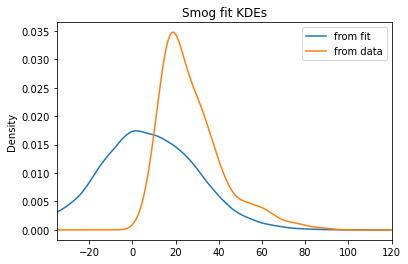

In [49]:
# Fit normal distribution with wind speed equation
smog_ws_zr_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

In [50]:
smog_zr_fit_data = fit_zr.draws_pd()
smog_zr_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1076.45,0.990718,0.02853,7.0,127.0,0.0,1078.96,33.1577,0.048133,-0.544594,...,-6.25381,-3.47628,-3.46684,-3.48442,-3.55899,-3.60258,-3.85275,-3.65658,-4.32664,-3.52854
1,-1079.02,0.914582,0.02853,3.0,15.0,0.0,1080.65,33.1718,0.174498,-0.586663,...,-6.28058,-3.46767,-3.46883,-3.47926,-3.56585,-3.55872,-3.81530,-3.64215,-4.34223,-3.52620
2,-1080.88,0.998109,0.02853,6.0,63.0,0.0,1084.86,33.0796,-0.020594,-0.416318,...,-6.92987,-3.43108,-3.44462,-3.43270,-3.57432,-3.64040,-3.76264,-3.60236,-4.60484,-3.51930
3,-1077.53,0.861678,0.02853,7.0,127.0,0.0,1089.79,32.9060,-0.097167,-0.390716,...,-6.52800,-3.45016,-3.41522,-3.45320,-3.47287,-3.81767,-3.95991,-3.67575,-4.34064,-3.42355
4,-1079.99,0.998727,0.02853,7.0,127.0,0.0,1083.58,32.4508,-0.014935,-0.437542,...,-6.59978,-3.43835,-3.41636,-3.44355,-3.50049,-3.70806,-3.88341,-3.72726,-4.39867,-3.62450


In [51]:
smog_zr_fit_df = pd.DataFrame(smog_zr_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_zr)}]'].values.flatten())
smog_zr_fit_df.columns = ["smog"]
smog_zr_fit_df.head()

,smog
0,39.7464
1,30.0984
2,26.7973
3,19.1357
4,10.6854


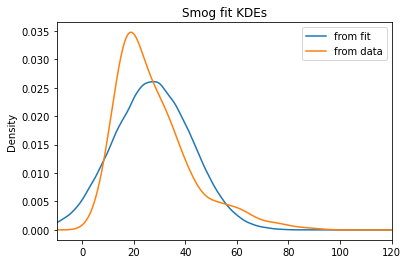

In [52]:
# Fit normal distribution
smog_zr_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

In [53]:
smog_ws_zr_fit_data_s = fit_ws_zr_s.draws_pd()
smog_ws_zr_fit_data_s.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-215.189,5.671390e-116,8.313460e-07,1.0,1.0,0.0,223.254,0.479852,1.40909,-0.840884,...,-18.0119,-12.4334,-11.4668,-12.0435,-12.9805,-4.8589,-10.1103,-12.0966,-16.2691,-12.7467
1,-215.189,7.471230e-158,8.313460e-07,1.0,1.0,0.0,221.748,0.479852,1.40909,-0.840884,...,-18.0119,-12.4334,-11.4668,-12.0435,-12.9805,-4.8589,-10.1103,-12.0966,-16.2691,-12.7467
2,-215.189,1.108540e-25,8.313460e-07,1.0,2.0,1.0,218.977,0.479852,1.40909,-0.840884,...,-18.0119,-12.4334,-11.4668,-12.0435,-12.9805,-4.8589,-10.1103,-12.0966,-16.2691,-12.7467
3,-215.189,2.956590e-50,8.313460e-07,1.0,2.0,1.0,220.176,0.479852,1.40909,-0.840884,...,-18.0119,-12.4334,-11.4668,-12.0435,-12.9805,-4.8589,-10.1103,-12.0966,-16.2691,-12.7467
4,-215.442,1.132250e-01,8.313460e-07,1.0,3.0,1.0,219.098,0.479851,1.40909,-0.840884,...,-18.0119,-12.4334,-11.4668,-12.0435,-12.9805,-4.8589,-10.1103,-12.0966,-16.2691,-12.7467


In [54]:
smog_ws_zr_fit_s_df = pd.DataFrame(smog_ws_zr_fit_data_s.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_zr)}]'].values.flatten())
smog_ws_zr_fit_s_df.columns = ["smog"]
smog_ws_zr_fit_s_df.head()

,smog
0,11.70540
1,6.96256
2,16.75740
3,5.07692
4,2.63666


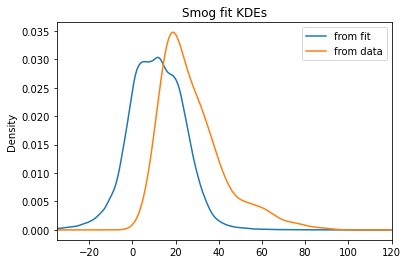

In [55]:
# fit t_student distribution with wind speed equation
smog_ws_zr_fit_s_df.smog.plot.kde(label='from fit')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

In [56]:
smog_zr_fit_data_s = fit_zr_s.draws_pd()
smog_zr_fit_data_s.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1076.89,0.962053,0.028888,7.0,127.0,0.0,1079.64,33.3700,0.032182,-0.491565,...,-5.99798,-3.47103,-3.47737,-3.47730,-3.61385,-3.66741,-3.89200,-3.72956,-4.53372,-3.59730
1,-1078.15,0.694589,0.028888,7.0,191.0,0.0,1081.20,36.8384,-0.057982,-0.598885,...,-5.42911,-3.60536,-3.51131,-3.61936,-3.56755,-3.73296,-4.13598,-3.89710,-4.15975,-3.52582
2,-1077.63,0.780728,0.028888,7.0,127.0,0.0,1081.59,37.3509,-0.145446,-0.542797,...,-5.52010,-3.58806,-3.51820,-3.59498,-3.58325,-3.76642,-4.10996,-3.93493,-4.22535,-3.55109
3,-1077.97,0.993507,0.028888,7.0,255.0,0.0,1082.55,36.9601,-0.046039,-0.606249,...,-5.76746,-3.47980,-3.43971,-3.49273,-3.55107,-3.59079,-4.01530,-3.81654,-4.32580,-3.61999
4,-1076.32,0.979857,0.028888,6.0,127.0,0.0,1080.03,35.5728,-0.035141,-0.534394,...,-5.90862,-3.46228,-3.44040,-3.47118,-3.56186,-3.64641,-3.97056,-3.74031,-4.42760,-3.52574


In [57]:
smog_zr_fit_s_df = pd.DataFrame(smog_zr_fit_data_s.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_zr)}]'].values.flatten())
smog_zr_fit_s_df.columns = ["smog"]
smog_zr_fit_s_df.head()

,smog
0,22.7166
1,17.0282
2,23.9864
3,26.4332
4,-17.8784


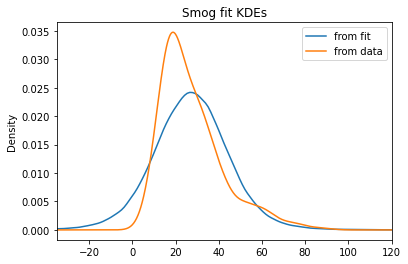

In [58]:
# Fit t_student distribution
smog_zr_fit_s_df.smog.plot.kde(label='from fit')
smog_relation["smog Złoty Róg"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

## Smog model Bulwarowa Street

In [59]:
df_b = smog_relation[["temp", "windspeed", "precipprob", "heating sezon", "weekend",  "smog Bulwarowa", "sealevelpressure"]]

<Axes: xlabel='precipprob', ylabel='smog Bulwarowa'>

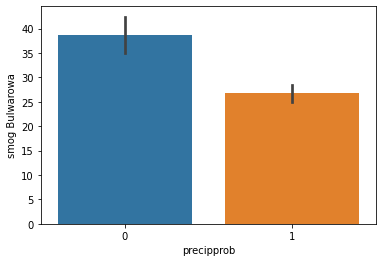

In [60]:
sns.barplot(data=df_b, x="precipprob", y="smog Bulwarowa")

In [61]:
precip_influence = df_b[df_b.precipprob == 1]["smog Bulwarowa"].mean() - df_b[df_b.precipprob == 0]["smog Bulwarowa"].mean()
precip_influence

-11.864557937508753

<Axes: xlabel='heating sezon', ylabel='smog Bulwarowa'>

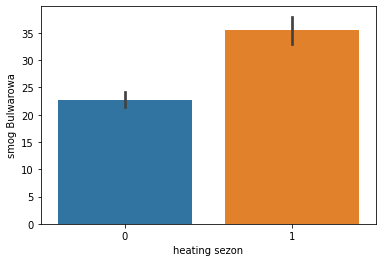

In [62]:
sns.barplot(data=df_b, x="heating sezon", y="smog Bulwarowa")

In [63]:
sezon_influence = df_b[df_b["heating sezon"] == 1]["smog Bulwarowa"].mean() - df_b[df_b["heating sezon"] == 0]["smog Bulwarowa"].mean()
sezon_influence

12.73185620915033

<Axes: xlabel='weekend', ylabel='smog Bulwarowa'>

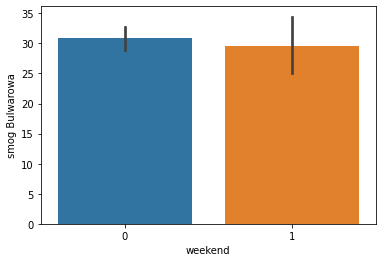

In [64]:
sns.barplot(data=df_b, x="weekend", y="smog Bulwarowa")

In [65]:
weekend_influence = df_b[df_b["weekend"] == 1]["smog Bulwarowa"].mean() - df_b[df_b["weekend"] == 0]["smog Bulwarowa"].mean()
weekend_influence

-1.278590988299726

In [66]:
df_b["weekend"].value_counts(normalize=True)

weekend
0    0.855956
1    0.144044
Name: proportion, dtype: float64

In [67]:
smog_bw_ppc = CmdStanModel(stan_file='./smog_bw_ppc.stan')

In [68]:
smog_bw_ppc_samples = smog_bw_ppc.sample(iter_warmup=1000, iter_sampling=1000, seed=6072023)
smog_bw_ppc_samples.summary()

10:31:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:40 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,29.995600,0.032455,2.025890,26.68750,29.963200,33.39220,3896.41,134359.0,0.999329
beta_temp,0.001495,0.015547,0.982239,-1.63387,-0.018214,1.62199,3991.52,137639.0,0.999205
beta_ws,0.004984,0.016033,1.004250,-1.62672,0.004823,1.68936,3923.25,135285.0,1.000590
d_pp,-11.976600,0.016318,1.017600,-13.67470,-11.969700,-10.30420,3888.74,134095.0,0.999618
d_hs,13.001900,0.015678,0.989906,11.37650,12.982700,14.64770,3986.61,137469.0,0.999406
d_wn,-0.993808,0.031182,1.978750,-4.18639,-1.022110,2.25446,4026.93,138860.0,0.999241
sigma,15.018600,0.015827,0.989930,13.37670,15.033900,16.64680,3912.32,134908.0,0.999864
windspeed,19.998300,0.162769,10.176300,3.40939,19.949500,36.57630,3908.77,134785.0,0.999528
precipprob,0.662250,0.007810,0.473002,0.00000,1.000000,1.00000,3668.35,126495.0,0.999967
heating_sezon,0.623000,0.007971,0.484696,0.00000,1.000000,1.00000,3697.75,127508.0,0.999260


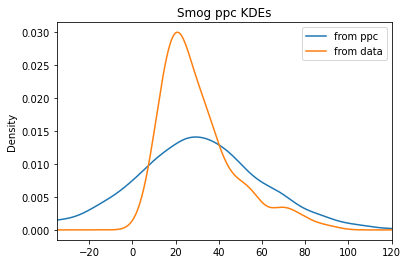

In [69]:
# Prior normal distribution
smog_bw_ppc_samples.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog ppc KDEs")
plt.show()

In [70]:
smog_bw_ppc_s = CmdStanModel(stan_file='./smog_bw_ppc_s.stan')

In [71]:
smog_bw_ppc_samples_s = smog_bw_ppc_s.sample(iter_warmup=1000, iter_sampling=1000, seed=6072023)
smog_bw_ppc_samples_s.summary()

10:31:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:41 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,30.000000,0.032440,2.041320,26.69880,29.966500,33.37680,3959.69,146655.0,0.999693
beta_temp,-0.017835,0.015618,0.981211,-1.61758,-0.014012,1.58057,3946.98,146185.0,0.999519
beta_ws,0.005662,0.015998,1.024650,-1.66009,0.023331,1.67308,4102.33,151938.0,1.000840
d_pp,-11.985700,0.015093,0.987550,-13.60310,-11.978600,-10.36460,4281.45,158572.0,1.000020
d_hs,13.013300,0.016722,1.011570,11.38900,12.995500,14.68390,3659.33,135531.0,0.999281
d_wn,-1.003190,0.031287,2.009960,-4.28548,-1.001370,2.31047,4127.05,152854.0,1.000130
sigma,14.998000,0.015804,1.018060,13.30300,14.989900,16.68020,4149.45,153683.0,1.000480
windspeed,19.970200,0.155058,9.971130,3.49227,20.002000,36.36490,4135.23,153157.0,0.999738
precipprob,0.659000,0.007477,0.474105,0.00000,1.000000,1.00000,4020.43,148905.0,1.000510
heating_sezon,0.630500,0.007735,0.482730,0.00000,1.000000,1.00000,3894.64,144246.0,0.999892


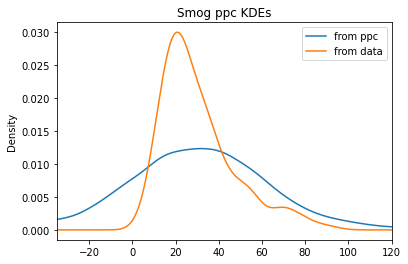

In [72]:
# Prior t_student distribution
smog_bw_ppc_samples_s.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog ppc KDEs")
plt.show()

In [73]:
smog_ws_bw_fit = CmdStanModel(stan_file='./smog_ws_bw_fit.stan')

In [74]:
smog_bw_fit = CmdStanModel(stan_file='./smog_bw_fit.stan')

In [75]:
smog_ws_bw_fit_s = CmdStanModel(stan_file='./smog_ws_bw_fit_s.stan')

In [76]:
smog_bw_fit_s = CmdStanModel(stan_file='./smog_bw_fit_s.stan')

In [77]:
data = {
    'N': len(df_b),
    'precipprob': df_b.precipprob.values,
    'pressure': df_b.sealevelpressure.values,
    'temp': df_b.temp.values,
    'weekend': df_b.weekend.values,
    'heating_sezon': df_b['heating sezon'].values,
    'smog': df_b['smog Bulwarowa'].values
}

fit_ws = smog_ws_bw_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_ws.summary())

10:31:42 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:43 - cmdstanpy - INFO - CmdStan done processing.
10:31:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is -1.24568, but must be positive! (in '/home/DA_project/smog_ws_bw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.608357, but must be positive! (in '/home/DA_project/smog_ws_bw_fit.stan', line 45, column 2 to column 69)
Consider re-running with show_console=True if the above output is unclear!
10:31:43 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 80 divergent transitions (80.0%)
	Chain 1 had 1 iterations at max treedepth (1.0%)
	Chain 2 had 95 divergent transitions (95.0%)
	Chain 3 had 77 divergent transitions (77.0%)
	Chain 4 had 1 iterations at max treedepth (1.0%)
	Use function "diagnose()" to see further information.



                     Mean         MCSE       StdDev            5%  \
lp__         -4759.820000  2541.840000  4574.490000 -17556.700000   
alpha            0.426364     0.909593     1.306150     -1.739480   
beta_temp        1.138830     0.344362     0.495784      0.350835   
beta_ws          0.354037     0.861230     1.236960     -0.839839   
d_pp            -0.124136     0.617706     0.887034     -1.398860   
...                   ...          ...          ...           ...   
log_lik[357]    -3.735350     0.251528     0.379377     -4.183910   
log_lik[358]   -10.923200     5.193220     9.414120    -36.688700   
log_lik[359]   -17.509000    10.217200    18.403700    -68.141100   
log_lik[360]   -35.752100    23.700000    42.352300   -150.518000   
log_lik[361]   -13.815400     7.173250    12.976400    -49.227000   

                      50%         95%    N_Eff  N_Eff/s      R_hat  
lp__         -2256.410000 -1646.19000  3.23885  2.23061    3.02755  
alpha            1.309470     1.

In [78]:
data = {
    'N': len(df_b),
    'precipprob': df_b.precipprob.values,
    'wind_speed': df_b.windspeed.values,
    'temp': df_b.temp.values,
    'weekend': df_b.weekend.values,
    'heating_sezon': df_b['heating sezon'].values,
    'smog': df_b['smog Bulwarowa'].values
}

fit = smog_bw_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit.summary())

10:31:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:44 - cmdstanpy - INFO - CmdStan done processing.



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1137.790000  0.144195  1.878690 -1141.450000 -1137.600000   
alpha           37.841400  0.125989  1.692730    35.181300    37.920000   
beta_temp        0.030063  0.004857  0.094953    -0.127975     0.028095   
beta_ws         -0.498734  0.004973  0.078898    -0.639061    -0.494886   
d_pp           -10.514900  0.040585  0.823137   -11.880300   -10.495100   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.747890  0.004285  0.073615    -3.881030    -3.743060   
log_lik[358]    -3.609570  0.001718  0.033379    -3.668080    -3.608840   
log_lik[359]    -3.589920  0.001649  0.032676    -3.646710    -3.588770   
log_lik[360]    -4.574310  0.007335  0.119353    -4.782720    -4.574070   
log_lik[361]    -3.592160  0.002406  0.040307    -3.661410    -3.588500   

                      95%    N_Eff   N_Eff/s     R_hat  
lp__         -1135.380000  169.749   92.8

In [79]:
data = {
    'N': len(df_b),
    'precipprob': df_b.precipprob.values,
    'pressure': df_b.sealevelpressure.values,
    'temp': df_b.temp.values,
    'weekend': df_b.weekend.values,
    'heating_sezon': df_b['heating sezon'].values,
    'smog': df_b['smog Bulwarowa'].values
}

fit_ws_s = smog_ws_bw_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_ws_s.summary())

10:31:45 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:46 - cmdstanpy - INFO - CmdStan done processing.
10:31:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is -1.24568, but must be positive! (in '/home/DA_project/smog_ws_bw_fit_s.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.608357, but must be positive! (in '/home/DA_project/smog_ws_bw_fit_s.stan', line 45, column 2 to column 69)
Consider re-running with show_console=True if the above output is unclear!
10:31:46 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 78 divergent transitions (78.0%)
	Chain 2 had 95 divergent transitions (95.0%)
	Chain 3 had 81 divergent transitions (81.0%)
	Use function "diagnose()" to see further information.



                     Mean         MCSE       StdDev            5%  \
lp__         -6292.030000  4369.400000  6770.580000 -21858.500000   
alpha            0.414241     0.909829     1.306450     -1.744930   
beta_temp        1.145490     0.345879     0.497271      0.350395   
beta_ws          0.342684     0.850052     1.220640     -0.834101   
d_pp            -0.130859     0.613354     0.880741     -1.403470   
...                   ...          ...          ...           ...   
log_lik[357]    -3.830650     0.235687     0.351978     -4.251070   
log_lik[358]    -6.642870     1.527890     2.250280    -10.690200   
log_lik[359]    -7.724220     1.899540     2.779490    -12.546800   
log_lik[360]    -9.350360     2.379200     3.461560    -14.926100   
log_lik[361]    -7.243250     1.669540     2.453100    -11.567700   

                      50%         95%    N_Eff  N_Eff/s      R_hat  
lp__         -2291.570000 -1646.35000  2.40109  2.16901    4.30047  
alpha            1.296760     1.

In [80]:
data = {
    'N': len(df_b),
    'precipprob': df_b.precipprob.values,
    'wind_speed': df_b.windspeed.values,
    'temp': df_b.temp.values,
    'weekend': df_b.weekend.values,
    'heating_sezon': df_b['heating sezon'].values,
    'smog': df_b['smog Bulwarowa'].values
}

fit_s = smog_bw_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_s.summary())

10:31:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:48 - cmdstanpy - INFO - CmdStan done processing.
10:31:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_bw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_bw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is 0, but must be positive finite! (in '/home/DA_project/smog_bw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_bw_fit_s.stan', line 38, column 2 to column 33)
Consider re-running with show_console=True if the above output is unclear!



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1101.750000  0.156652  1.785520 -1105.050000 -1101.490000   
alpha           34.538300  0.115500  1.568860    31.919600    34.489700   
beta_temp        0.258560  0.004644  0.085535     0.124315     0.255906   
beta_ws         -0.547965  0.003680  0.063099    -0.650346    -0.543162   
d_pp            -9.732410  0.053190  0.875581   -11.030900    -9.772620   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.292240  0.005301  0.099404    -3.453860    -3.285290   
log_lik[358]    -3.165940  0.003338  0.064592    -3.276980    -3.167630   
log_lik[359]    -3.177120  0.003485  0.065404    -3.281980    -3.179120   
log_lik[360]    -5.759060  0.012301  0.232787    -6.129280    -5.758940   
log_lik[361]    -3.223890  0.005032  0.081034    -3.359980    -3.216760   

                      95%    N_Eff   N_Eff/s     R_hat  
lp__         -1099.390000  129.915   50.6

In [81]:
smog_ws_bw_fit_data = fit_ws.draws_pd()
smog_ws_bw_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-7365.69,0.997574,0.000011,7.0,127.0,0.0,7385.33,0.491511,1.47464,-0.834714,...,-102.731,-17.8754,-11.2154,-21.2497,-23.8943,-3.55075,-18.0642,-29.6597,-67.1682,-23.8311
1,-7296.44,0.999887,0.000011,8.0,255.0,0.0,7377.82,0.491578,1.47601,-0.836571,...,-101.774,-17.7284,-11.1319,-21.0679,-23.6868,-3.54310,-17.9184,-29.4017,-66.5494,-23.6238
2,-7278.31,0.997623,0.000011,7.0,127.0,0.0,7299.47,0.491342,1.47605,-0.836649,...,-101.533,-17.6917,-11.1112,-21.0230,-23.6355,-3.54131,-17.8813,-29.3368,-66.3943,-23.5729
3,-7254.81,0.744523,0.000011,7.0,127.0,0.0,7281.66,0.491317,1.47642,-0.836353,...,-101.199,-17.6411,-11.0828,-20.9604,-23.5639,-3.53898,-17.8308,-29.2454,-66.1785,-23.5004
4,-7202.61,0.802683,0.000011,7.0,127.0,0.0,7258.71,0.492350,1.47636,-0.836761,...,-100.469,-17.5315,-11.0220,-20.8262,-23.4104,-3.53442,-17.7197,-29.0502,-65.7084,-23.3497


In [82]:
smog_ws_bw_fit_df = pd.DataFrame(smog_ws_bw_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_b)}]'].values.flatten())
smog_ws_bw_fit_df.columns = ["smog"]
smog_ws_bw_fit_df.head()

,smog
0,9.06973
1,9.73119
2,17.08080
3,6.29804
4,4.14928


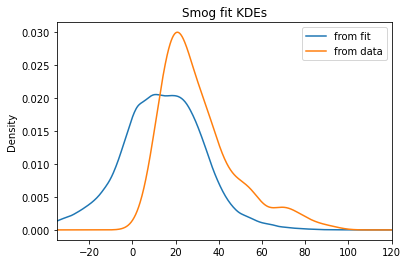

In [83]:
# Fit normal distribution with wind speed equation
smog_ws_bw_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

In [84]:
smog_bw_fit_data = fit.draws_pd()
smog_bw_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1140.82,0.976002,0.034654,7.0,127.0,0.0,1144.39,36.8549,-0.068156,-0.266617,...,-6.22011,-3.59308,-3.61162,-3.58953,-3.67554,-3.96220,-3.61791,-3.61581,-4.75188,-3.59596
1,-1143.55,0.732982,0.034654,7.0,127.0,0.0,1147.67,35.0646,0.013494,-0.416022,...,-5.63858,-3.63958,-3.62354,-3.57018,-3.60955,-3.94215,-3.66744,-3.59096,-4.40845,-3.63530
2,-1139.32,0.911130,0.034654,6.0,63.0,0.0,1144.49,35.3397,0.199700,-0.565992,...,-5.79144,-3.59959,-3.57372,-3.57190,-3.70365,-3.68834,-3.60037,-3.57412,-4.56905,-3.58626
3,-1139.80,0.925477,0.034654,7.0,127.0,0.0,1142.36,35.7950,-0.053872,-0.289099,...,-6.11011,-3.60929,-3.62336,-3.60243,-3.68791,-3.94499,-3.63252,-3.63132,-4.70969,-3.66654
4,-1138.52,0.957238,0.034654,7.0,127.0,0.0,1142.35,38.9784,-0.123442,-0.552863,...,-5.52595,-3.63132,-3.58607,-3.57474,-3.66462,-3.74117,-3.64868,-3.58725,-4.40254,-3.58187


In [85]:
smog_bw_fit_df = pd.DataFrame(smog_bw_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_b)}]'].values.flatten())
smog_bw_fit_df.columns = ["smog"]
smog_bw_fit_df.head()

,smog
0,49.47190
1,38.96000
2,31.93690
3,1.33853
4,4.02125


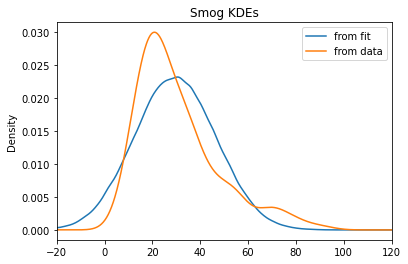

In [86]:
# Fit normal distribution
smog_bw_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-20, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

In [87]:
smog_ws_bw_fit_data_s = fit_ws_s.draws_pd()
smog_ws_bw_fit_data_s.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-7365.69,0.997574,0.000011,7.0,127.0,0.0,7385.33,0.491511,1.47464,-0.834714,...,-13.6346,-8.39746,-7.00542,-8.91451,-9.26539,-3.59180,-8.42887,-9.91227,-12.3609,-9.25747
1,-6996.81,0.974594,0.000011,8.0,255.0,0.0,7371.38,0.492720,1.47518,-0.833175,...,-13.5020,-8.28374,-6.90519,-8.79701,-9.14576,-3.56862,-8.31510,-9.78975,-12.2303,-9.13806
2,-6935.37,0.999874,0.000011,7.0,127.0,0.0,7000.69,0.491788,1.47605,-0.834161,...,-13.4794,-8.26410,-6.88764,-8.77657,-9.12498,-3.56405,-8.29574,-9.76871,-12.2080,-9.11720
3,-6901.79,0.949053,0.000011,7.0,127.0,0.0,6938.63,0.491450,1.47635,-0.834508,...,-13.4674,-8.25380,-6.87850,-8.76587,-9.11409,-3.56182,-8.28553,-9.75752,-12.1962,-9.10620
4,-6873.48,0.982545,0.000011,7.0,127.0,0.0,6903.40,0.491030,1.47591,-0.833949,...,-13.4569,-8.24507,-6.87104,-8.75693,-9.10495,-3.56060,-8.27662,-9.74808,-12.1860,-9.09719


In [88]:
smog_ws_bw_fit_df_s = pd.DataFrame(smog_ws_bw_fit_data_s.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_b)}]'].values.flatten())
smog_ws_bw_fit_df_s.columns = ["smog"]
smog_ws_bw_fit_df_s.head()

,smog
0,10.45340
1,13.06280
2,6.92467
3,3.27514
4,22.39850


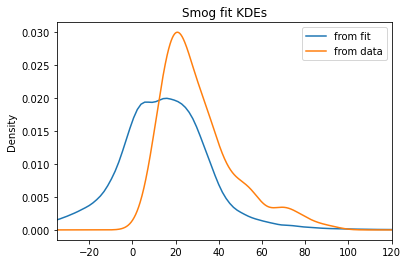

In [89]:
# Fit t_student distribution with wind speed equation
smog_ws_bw_fit_df_s.smog.plot.kde(label='from fit')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

In [90]:
smog_bw_fit_data_s = fit.draws_pd()
smog_bw_fit_data_s.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1140.82,0.976002,0.034654,7.0,127.0,0.0,1144.39,36.8549,-0.068156,-0.266617,...,-6.22011,-3.59308,-3.61162,-3.58953,-3.67554,-3.96220,-3.61791,-3.61581,-4.75188,-3.59596
1,-1143.55,0.732982,0.034654,7.0,127.0,0.0,1147.67,35.0646,0.013494,-0.416022,...,-5.63858,-3.63958,-3.62354,-3.57018,-3.60955,-3.94215,-3.66744,-3.59096,-4.40845,-3.63530
2,-1139.32,0.911130,0.034654,6.0,63.0,0.0,1144.49,35.3397,0.199700,-0.565992,...,-5.79144,-3.59959,-3.57372,-3.57190,-3.70365,-3.68834,-3.60037,-3.57412,-4.56905,-3.58626
3,-1139.80,0.925477,0.034654,7.0,127.0,0.0,1142.36,35.7950,-0.053872,-0.289099,...,-6.11011,-3.60929,-3.62336,-3.60243,-3.68791,-3.94499,-3.63252,-3.63132,-4.70969,-3.66654
4,-1138.52,0.957238,0.034654,7.0,127.0,0.0,1142.35,38.9784,-0.123442,-0.552863,...,-5.52595,-3.63132,-3.58607,-3.57474,-3.66462,-3.74117,-3.64868,-3.58725,-4.40254,-3.58187


In [91]:
smog_bw_fit_df_s = pd.DataFrame(smog_bw_fit_data_s.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_b)}]'].values.flatten())
smog_bw_fit_df_s.columns = ["smog"]
smog_bw_fit_df_s.head()

,smog
0,49.47190
1,38.96000
2,31.93690
3,1.33853
4,4.02125


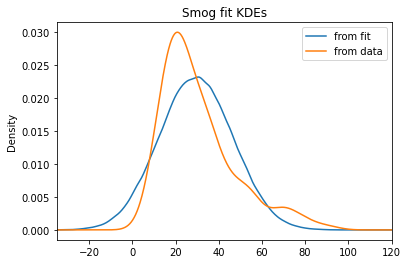

In [92]:
# fit t_student distribution
smog_bw_fit_df_s.smog.plot.kde(label='from fit')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

## Smog model Swoszowice

In [93]:
df_sw = smog_relation[["temp", "windspeed", "precipprob", "heating sezon", "weekend",  "smog Swoszowice", "sealevelpressure"]]


<Axes: xlabel='precipprob', ylabel='smog Swoszowice'>

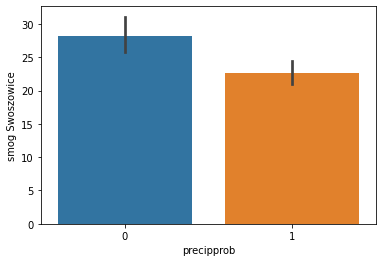

In [94]:
sns.barplot(data=df_sw, x="precipprob", y="smog Swoszowice")

In [95]:
precip_influence = df_sw[df_sw.precipprob == 1]["smog Swoszowice"].mean() - df_sw[df_sw.precipprob == 0]["smog Swoszowice"].mean()
precip_influence

-5.643015272523474

<Axes: xlabel='heating sezon', ylabel='smog Swoszowice'>

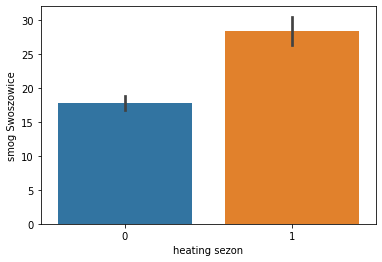

In [96]:
sns.barplot(data=df_sw, x="heating sezon", y="smog Swoszowice")

In [97]:
sezon_influence = df_sw[df_sw["heating sezon"] == 1]["smog Swoszowice"].mean() - df_sw[df_sw["heating sezon"] == 0]["smog Swoszowice"].mean()
sezon_influence

10.602571895424838

<Axes: xlabel='weekend', ylabel='smog Swoszowice'>

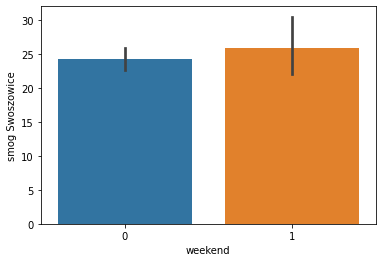

In [98]:
sns.barplot(data=df_sw, x="weekend", y="smog Swoszowice")

In [99]:
weekend_influence = df_sw[df_sw["weekend"] == 1]["smog Swoszowice"].mean() - df_sw[df_sw["weekend"] == 0]["smog Swoszowice"].mean()
weekend_influence

1.645848892208118

In [100]:
smog_sw_ppc = CmdStanModel(stan_file='./smog_sw_ppc.stan')

In [101]:
smog_sw_ppc_samples = smog_sw_ppc.sample(iter_warmup=1000, iter_sampling=1000, seed=9072023)
smog_sw_ppc_samples.summary()

10:31:56 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:57 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,24.962500,0.032824,2.008010,21.60270,24.966500,28.26550,3742.49,178214.0,0.999909
beta_temp,-0.018414,0.017004,1.026950,-1.74491,-0.004029,1.64825,3647.35,173684.0,1.000240
beta_ws,0.019357,0.015647,1.013070,-1.64880,0.041431,1.67563,4191.78,199609.0,0.999810
d_pp,-5.998050,0.016520,1.024280,-7.74783,-5.984160,-4.30414,3844.30,183062.0,1.000040
d_hs,11.012500,0.016300,0.999530,9.38796,10.996800,12.64660,3760.47,179070.0,1.001020
d_wn,2.012330,0.031670,1.967600,-1.22677,2.003850,5.27255,3859.99,183809.0,0.999874
sigma,20.006800,0.015875,0.994030,18.36450,20.005200,21.64570,3920.63,186697.0,1.000520
windspeed,20.078100,0.172219,9.993360,3.61903,19.982200,36.24530,3367.13,160340.0,0.999967
precipprob,0.668500,0.007542,0.470811,0.00000,1.000000,1.00000,3896.75,185560.0,1.000320
heating_sezon,0.618750,0.007749,0.485754,0.00000,1.000000,1.00000,3929.80,187133.0,1.000450


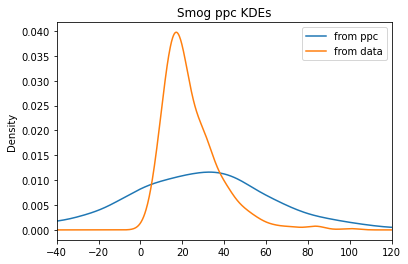

In [102]:
# Prior normal distribution
smog_sw_ppc_samples.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Swoszowice"].plot.kde(label='from data')
plt.xlim(-40, 120)
plt.legend()
plt.title("Smog ppc KDEs")
plt.show()

In [103]:
smog_sw_ppc_s = CmdStanModel(stan_file='./smog_sw_ppc_s.stan')

In [104]:
smog_sw_ppc_samples_s = smog_sw_ppc_s.sample(iter_warmup=1000, iter_sampling=1000, seed=9072023)
smog_sw_ppc_samples_s.summary()

10:31:57 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:57 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,24.962500,0.032824,2.008010,21.60270,24.966500,28.26550,3742.49,74849.8,0.999909
beta_temp,-0.018414,0.017004,1.026950,-1.74491,-0.004029,1.64825,3647.35,72947.1,1.000240
beta_ws,0.019357,0.015647,1.013070,-1.64880,0.041431,1.67563,4191.78,83835.6,0.999810
d_pp,-5.998050,0.016520,1.024280,-7.74783,-5.984160,-4.30414,3844.30,76886.0,1.000040
d_hs,11.012500,0.016300,0.999530,9.38796,10.996800,12.64660,3760.47,75209.4,1.001020
d_wn,2.012330,0.031670,1.967600,-1.22677,2.003850,5.27255,3859.99,77199.7,0.999874
sigma,20.006800,0.015875,0.994030,18.36450,20.005200,21.64570,3920.63,78412.7,1.000520
windspeed,20.078100,0.172219,9.993360,3.61903,19.982200,36.24530,3367.13,67342.7,0.999967
precipprob,0.668500,0.007542,0.470811,0.00000,1.000000,1.00000,3896.75,77935.0,1.000320
heating_sezon,0.618750,0.007749,0.485754,0.00000,1.000000,1.00000,3929.80,78596.0,1.000450


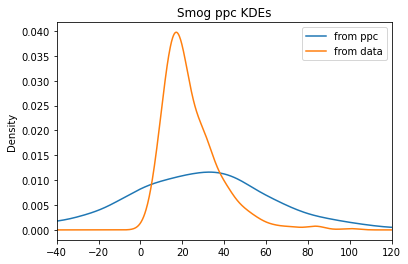

In [105]:
# Prior t_studnet distribution
smog_sw_ppc_samples_s.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Swoszowice"].plot.kde(label='from data')
plt.xlim(-40, 120)
plt.legend()
plt.title("Smog ppc KDEs")
plt.show()

In [106]:
smog_ws_sw_fit = CmdStanModel(stan_file='./smog_ws_sw_fit.stan')

In [107]:
smog_sw_fit = CmdStanModel(stan_file='./smog_sw_fit.stan')

In [108]:
smog_ws_sw_fit_s = CmdStanModel(stan_file='./smog_ws_sw_fit_s.stan')

In [109]:
smog_sw_fit_s = CmdStanModel(stan_file='./smog_sw_fit_s.stan')

In [110]:
data = {
    'N': len(df_sw),
    'precipprob': df_sw.precipprob.values,
    'pressure': df_sw.sealevelpressure.values,
    'temp': df_sw.temp.values,
    'weekend': df_sw.weekend.values,
    'heating_sezon': df_sw['heating sezon'].values,
    'smog': df_sw['smog Swoszowice'].values
}

fit_ws_sw = smog_ws_sw_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=9072023)

print(fit_ws_sw.summary())

10:31:59 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:32:00 - cmdstanpy - INFO - CmdStan done processing.
10:32:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is -1.70427, but must be positive! (in '/home/DA_project/smog_ws_sw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.601857, but must be positive! (in '/home/DA_project/smog_ws_sw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.617113, but must be positive! (in '/home/DA_project/smog_ws_sw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.857282, but must be positive! (in '/home/DA_project/smog_ws_sw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -1.65898, but must be positive! (in '/home/DA_project/smog_ws_sw_fit.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -1.50111, but must be positive! (in '/home/DA_project/smog_ws_sw_fit.stan


                     Mean        MCSE       StdDev           5%          50%  \
lp__         -2544.970000  773.487000  2003.160000 -7673.670000 -1656.600000   
alpha            0.302227    0.678612     0.977917    -1.169200     0.349984   
beta_temp        0.544762    0.497501     0.741515    -0.667063     1.101220   
beta_ws          0.238205    0.260621     0.374403    -0.239881     0.353647   
d_pp             0.158297    0.867602     1.247710    -1.913790     1.251620   
...                   ...         ...          ...          ...          ...   
log_lik[357]    -4.177430    0.382773     0.850302    -6.503260    -4.140410   
log_lik[358]    -4.281430    0.207128     0.588032    -5.782600    -4.171620   
log_lik[359]    -4.232610    0.260426     0.621793    -5.957400    -4.144300   
log_lik[360]    -9.763220    3.119700    10.034100   -37.882100    -5.679870   
log_lik[361]    -4.629460    0.577638     1.449660    -8.923140    -4.258650   

                      95%     N_Eff   

In [111]:
data = {
    'N': len(df_sw),
    'precipprob': df_sw.precipprob.values,
    'wind_speed': df_sw.windspeed.values,
    'temp': df_sw.temp.values,
    'weekend': df_sw.weekend.values,
    'heating_sezon': df_sw['heating sezon'].values,
    'smog': df_sw['smog Swoszowice'].values
}

fit_sw = smog_sw_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=9072023)

print(fit_sw.summary())

10:32:01 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:32:02 - cmdstanpy - INFO - CmdStan done processing.



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1067.720000  0.155481  1.834580 -1071.180000 -1067.510000   
alpha           33.056800  0.126069  1.404720    30.848100    33.041400   
beta_temp       -0.222004  0.005196  0.077847    -0.346904    -0.220873   
beta_ws         -0.493161  0.009070  0.064772    -0.604804    -0.490275   
d_pp            -5.019330  0.045972  0.806773    -6.407800    -5.023420   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.560300  0.003417  0.066375    -3.677260    -3.559660   
log_lik[358]    -4.352060  0.006328  0.105946    -4.517870    -4.348560   
log_lik[359]    -4.918080  0.007495  0.148103    -5.170020    -4.917030   
log_lik[360]    -3.624720  0.004479  0.062118    -3.729250    -3.626400   
log_lik[361]    -4.381840  0.013654  0.180377    -4.698240    -4.370070   

                      95%     N_Eff   N_Eff/s     R_hat  
lp__         -1065.130000  139.2260   66

In [112]:
data = {
    'N': len(df_sw),
    'precipprob': df_sw.precipprob.values,
    'pressure': df_sw.sealevelpressure.values,
    'temp': df_sw.temp.values,
    'weekend': df_sw.weekend.values,
    'heating_sezon': df_sw['heating sezon'].values,
    'smog': df_sw['smog Swoszowice'].values
}

fit_ws_sw_s = smog_ws_sw_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=9072023)

print(fit_ws_sw_s.summary())

10:32:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:32:04 - cmdstanpy - INFO - CmdStan done processing.
10:32:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is -1.70427, but must be positive! (in '/home/DA_project/smog_ws_sw_fit_s.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.601857, but must be positive! (in '/home/DA_project/smog_ws_sw_fit_s.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.617113, but must be positive! (in '/home/DA_project/smog_ws_sw_fit_s.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -0.857282, but must be positive! (in '/home/DA_project/smog_ws_sw_fit_s.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -1.65898, but must be positive! (in '/home/DA_project/smog_ws_sw_fit_s.stan', line 45, column 2 to column 69)
	Exception: normal_lpdf: Scale parameter is -1.50111, but must be positive! (in '/home/DA_project/smog_ws_s


                     Mean         MCSE       StdDev           5%          50%  \
lp__         -3161.200000  1361.060000  2576.000000 -9027.390000 -1656.750000   
alpha            0.252043     0.663835     0.953621    -1.169340     0.349869   
beta_temp        0.442521     0.551888     0.809728    -0.715887     1.101060   
beta_ws          0.213284     0.271910     0.393349    -0.223156     0.353949   
d_pp             0.122830     0.906086     1.301320    -1.929850     1.251620   
...                   ...          ...          ...          ...          ...   
log_lik[357]    -4.281010     0.437549     0.732744    -5.958230    -4.019380   
log_lik[358]    -4.372050     0.256826     0.455811    -5.519050    -4.289600   
log_lik[359]    -4.342680     0.310477     0.524361    -5.642060    -4.073230   
log_lik[360]    -6.817140     1.057100     2.048080   -10.755800    -5.550890   
log_lik[361]    -4.693140     0.564276     0.940864    -7.018120    -4.416610   

                      95% 

In [113]:
data = {
    'N': len(df_sw),
    'precipprob': df_sw.precipprob.values,
    'wind_speed': df_sw.windspeed.values,
    'temp': df_sw.temp.values,
    'weekend': df_sw.weekend.values,
    'heating_sezon': df_sw['heating sezon'].values,
    'smog': df_sw['smog Swoszowice'].values
}

fit_sw_s = smog_sw_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_sw_s.summary())

10:32:04 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:32:05 - cmdstanpy - INFO - CmdStan done processing.
10:32:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_sw_fit_s.stan', line 38, column 2 to column 33)
	Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_sw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_sw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is 0, but must be positive finite! (in '/home/DA_project/smog_sw_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_sw_fit_s.stan', line 38, column 2 to column 33)
Consider re-running with show_console=True if the above output is unclear!



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1010.330000  0.225315  2.046830 -1014.380000 -1009.950000   
alpha           29.594700  0.144911  1.402690    27.265500    29.652300   
beta_temp        0.018601  0.004999  0.068650    -0.095897     0.016891   
beta_ws         -0.533502  0.003787  0.053568    -0.627905    -0.531997   
d_pp            -4.195000  0.046982  0.731578    -5.473650    -4.173480   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -2.929630  0.006291  0.109786    -3.125950    -2.924580   
log_lik[358]    -4.522200  0.012560  0.197930    -4.860490    -4.513790   
log_lik[359]    -5.377580  0.012394  0.220570    -5.734410    -5.366770   
log_lik[360]    -4.284540  0.016246  0.236645    -4.667350    -4.293550   
log_lik[361]    -4.198470  0.018080  0.250064    -4.641560    -4.177500   

                      95%     N_Eff   N_Eff/s     R_hat  
lp__         -1007.740000   82.5239   35

In [114]:
smog_ws_sw_fit_data = fit_ws_sw.draws_pd()
smog_ws_sw_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1654.62,1.512840e-06,0.000077,1.0,3.0,1.0,1657.98,-1.16926,-0.137326,0.777857,...,-5.60743,-4.25086,-4.35123,-4.69446,-4.87418,-4.21789,-4.21733,-4.27888,-5.51698,-4.40402
1,-1655.12,8.485100e-02,0.000077,2.0,5.0,1.0,1660.66,-1.16920,-0.137523,0.777948,...,-5.60753,-4.25086,-4.35124,-4.69451,-4.87425,-4.21789,-4.21731,-4.27888,-5.51708,-4.40405
2,-1655.12,8.291080e-05,0.000077,1.0,3.0,1.0,1657.33,-1.16920,-0.137523,0.777948,...,-5.60753,-4.25086,-4.35124,-4.69451,-4.87425,-4.21789,-4.21731,-4.27888,-5.51708,-4.40405
3,-1655.12,1.199730e-08,0.000077,1.0,3.0,1.0,1659.09,-1.16920,-0.137523,0.777948,...,-5.60753,-4.25086,-4.35124,-4.69451,-4.87425,-4.21789,-4.21731,-4.27888,-5.51708,-4.40405
4,-1655.12,1.248040e-02,0.000077,1.0,3.0,0.0,1661.82,-1.16920,-0.137523,0.777948,...,-5.60753,-4.25086,-4.35124,-4.69451,-4.87425,-4.21789,-4.21731,-4.27888,-5.51708,-4.40405


In [115]:
smog_ws_sw_fit_df = pd.DataFrame(smog_ws_sw_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_sw)}]'].values.flatten())
smog_ws_sw_fit_df.columns = ["smog"]
smog_ws_sw_fit_df.head()

,smog
0,-3.74640
1,-18.43170
2,27.38780
3,-6.37676
4,6.05120


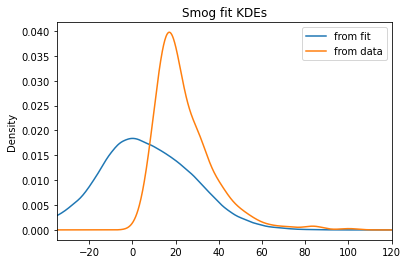

In [116]:
# Fit normal distribution with wind speed equation
smog_ws_sw_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Swoszowice"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

In [117]:
smog_sw_fit_data = fit_sw.draws_pd()
smog_sw_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1067.86,0.980020,0.027776,6.0,127.0,0.0,1070.20,33.1934,-0.297366,-0.435096,...,-3.67519,-4.25531,-3.62254,-3.53934,-3.53137,-3.64251,-4.26713,-4.76862,-3.70384,-4.37231
1,-1065.90,0.934449,0.027776,5.0,43.0,0.0,1070.42,33.0939,-0.276164,-0.413363,...,-3.60900,-4.35546,-3.56172,-3.43834,-3.41558,-3.60173,-4.37563,-5.00998,-3.63937,-4.50934
2,-1065.74,0.901213,0.027776,7.0,127.0,0.0,1070.15,32.9956,-0.222668,-0.472248,...,-3.58907,-4.38323,-3.59781,-3.51339,-3.46318,-3.60465,-4.36700,-4.80546,-3.62333,-4.29347
3,-1065.78,1.000000,0.027776,3.0,7.0,0.0,1066.11,33.0040,-0.194263,-0.511601,...,-3.55881,-4.38822,-3.51446,-3.45213,-3.42593,-3.50357,-4.34684,-4.83720,-3.60686,-4.27314
4,-1067.18,0.916299,0.027776,7.0,127.0,0.0,1070.83,31.1183,-0.178666,-0.502563,...,-3.55984,-4.42718,-3.58439,-3.51395,-3.44879,-3.57754,-4.38831,-4.84036,-3.59803,-4.41322


In [118]:
smog_sw_fit_df = pd.DataFrame(smog_sw_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_sw)}]'].values.flatten())
smog_sw_fit_df.columns = ["smog"]
smog_sw_fit_df.head()

,smog
0,33.68610
1,48.74950
2,5.55400
3,1.72446
4,11.97300


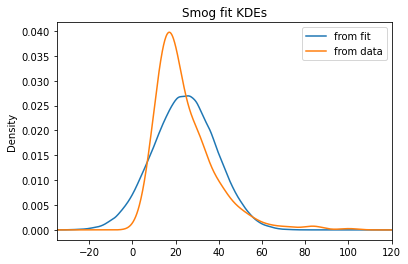

In [119]:
# Fit normal distribution
smog_sw_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Swoszowice"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

In [120]:
smog_ws_sw_fit_data_s = fit_ws_sw_s.draws_pd()
smog_ws_sw_fit_data_s.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1654.62,1.512840e-06,0.000077,1.0,3.0,1.0,1657.98,-1.16926,-0.137326,0.777857,...,-5.56101,-4.32762,-4.43842,-4.78909,-4.95756,-4.29031,-4.28967,-4.35897,-5.49281,-4.49509
1,-1654.62,3.815380e-08,0.000077,1.0,3.0,1.0,1660.65,-1.16926,-0.137326,0.777857,...,-5.56101,-4.32762,-4.43842,-4.78909,-4.95756,-4.29031,-4.28967,-4.35897,-5.49281,-4.49509
2,-1654.55,3.333330e-01,0.000077,1.0,3.0,0.0,1660.90,-1.16935,-0.137205,0.777831,...,-5.56087,-4.32766,-4.43844,-4.78904,-4.95749,-4.29036,-4.28972,-4.35900,-5.49268,-4.49509
3,-1654.55,5.547110e-02,0.000077,1.0,3.0,1.0,1656.69,-1.16935,-0.137205,0.777831,...,-5.56087,-4.32766,-4.43844,-4.78904,-4.95749,-4.29036,-4.28972,-4.35900,-5.49268,-4.49509
4,-1654.47,3.333580e-01,0.000077,1.0,3.0,0.0,1661.25,-1.16935,-0.137430,0.777841,...,-5.56106,-4.32761,-4.43842,-4.78912,-4.95760,-4.29030,-4.28965,-4.35896,-5.49286,-4.49511


In [121]:
smog_ws_sw_fit_df_s = pd.DataFrame(smog_ws_sw_fit_data_s.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_sw)}]'].values.flatten())
smog_ws_sw_fit_df_s.columns = ["smog"]
smog_ws_sw_fit_df_s.head()

,smog
0,-3.24041
1,-15.08050
2,4.20506
3,34.38040
4,-22.90630


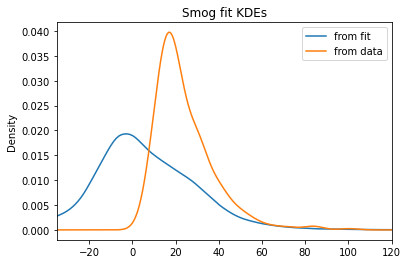

In [122]:
# Fit t_student distribution with wind speed equation
smog_ws_sw_fit_df_s.smog.plot.kde(label='from fit')
smog_relation["smog Swoszowice"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

In [123]:
smog_sw_fit_data_s = fit_sw_s.draws_pd()
smog_sw_fit_data_s.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1009.46,0.847298,0.019471,7.0,127.0,0.0,1010.53,29.2519,-0.027491,-0.480065,...,-4.11391,-4.95025,-3.02429,-2.83439,-3.28503,-3.04223,-4.83307,-5.55464,-4.26040,-4.36437
1,-1008.90,0.886283,0.019471,7.0,127.0,0.0,1013.77,27.7610,0.104676,-0.492624,...,-4.31939,-4.69899,-2.92401,-2.80701,-3.44054,-2.93029,-4.52231,-5.53756,-4.46547,-4.30649
2,-1008.88,0.890135,0.019471,7.0,127.0,0.0,1011.85,27.9867,0.097808,-0.549164,...,-3.97748,-4.69881,-2.99170,-2.92785,-3.38704,-2.95486,-4.49893,-5.21822,-4.14863,-4.18370
3,-1008.14,0.901092,0.019471,8.0,255.0,0.0,1012.10,29.8096,0.016304,-0.500738,...,-4.21153,-4.70927,-2.94038,-2.83001,-3.43057,-2.93587,-4.56353,-5.45953,-4.36775,-4.03983
4,-1008.06,0.601345,0.019471,6.0,127.0,0.0,1015.07,29.4103,0.063132,-0.578784,...,-4.02974,-4.55159,-2.93703,-2.91272,-3.52267,-2.90375,-4.34751,-5.22069,-4.22500,-4.07019


In [124]:
smog_sw_fit_df_s = pd.DataFrame(smog_sw_fit_data_s.loc[:, 'smog_hat[1]':f'smog_hat[{len(df_sw)}]'].values.flatten())
smog_sw_fit_df_s.columns = ["smog"]
smog_sw_fit_df_s.head()

,smog
0,22.57310
1,9.31017
2,27.15120
3,18.23270
4,20.73050


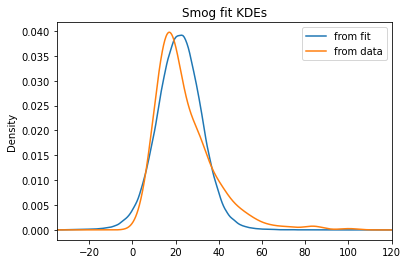

In [125]:
# Fit t_student t-distribution
smog_sw_fit_df_s.smog.plot.kde(label='from fit')
smog_relation["smog Swoszowice"].plot.kde(label='from data')
plt.xlim(-35, 120)
plt.legend()
plt.title("Smog fit KDEs")
plt.show()

## LOO/WAIC for smog on Złoty Róg Street

In [126]:
fit_normal = az.from_cmdstanpy(posterior=fit_zr, posterior_predictive = 'smog_hat', observed_data = {'smog': df_zr["smog Złoty Róg"]})
fit_student= az.from_cmdstanpy(posterior=fit_zr_s, posterior_predictive = 'smog_hat', observed_data = {'smog': df_zr["smog Złoty Róg"]})

model_dict = {"Smog Fit Normal Model": fit_normal, "Smog Fit T_Student Model": fit_student}

                          rank     elpd_loo     p_loo  elpd_diff    weight  \
Smog Fit Normal Model        0  2809.316003  4.571082   0.000000  0.744819   
Smog Fit T_Student Model     1  2816.349436  2.733748   7.033433  0.255181   

                                 se        dse  warning     scale  
Smog Fit Normal Model     33.482254   0.000000    False  deviance  
Smog Fit T_Student Model  24.049117  11.096589    False  deviance  


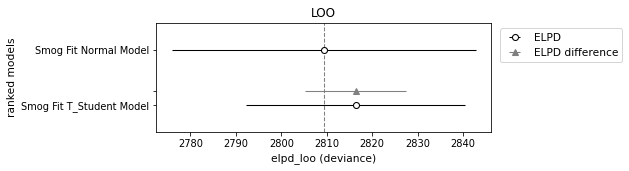

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Smog Fit Normal Model,0,2809.316003,4.571082,0.000000,0.744819,33.482254,0.000000,False,deviance
Smog Fit T_Student Model,1,2816.349436,2.733748,7.033433,0.255181,24.049117,11.096589,False,deviance


In [127]:
model_comparison = az.compare(model_dict, ic="loo", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()
model_comparison.head()

                          rank    elpd_waic     p_waic  elpd_diff    weight  \
Smog Fit T_Student Model     0  2752.221707  12.165902   0.000000  0.681015   
Smog Fit Normal Model        1  2795.801565   6.412198  43.579859  0.318985   

                                 se        dse  warning     scale  
Smog Fit T_Student Model  56.570778   0.000000    False  deviance  
Smog Fit Normal Model     46.950066  30.771421     True  deviance  


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


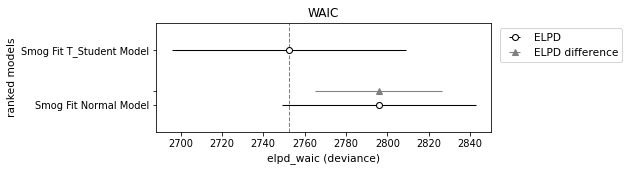

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
Smog Fit T_Student Model,0,2752.221707,12.165902,0.000000,0.681015,56.570778,0.000000,False,deviance
Smog Fit Normal Model,1,2795.801565,6.412198,43.579859,0.318985,46.950066,30.771421,True,deviance


In [135]:
model_comparison = az.compare(model_dict, ic="waic", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()
model_comparison.head()

## LOO/WAIC for smog on Bulwarowa Street

In [129]:
fit_normal = az.from_cmdstanpy(posterior=fit, posterior_predictive = 'smog_hat', observed_data = {'smog': df_b["smog Bulwarowa"]})
fit_student= az.from_cmdstanpy(posterior=fit_s, posterior_predictive = 'smog_hat', observed_data = {'smog': df_b["smog Bulwarowa"]})

model_dict = {"Smog Fit Normal Model": fit_normal, "Smog Fit T_Student Model": fit_student}

                          rank     elpd_loo      p_loo  elpd_diff    weight  \
Smog Fit T_Student Model     0  2752.450037  12.280067    0.00000  0.680646   
Smog Fit Normal Model        1  2795.846298   6.434565   43.39626  0.319354   

                                 se        dse  warning     scale  
Smog Fit T_Student Model  56.579885   0.000000    False  deviance  
Smog Fit Normal Model     46.937896  30.765342    False  deviance  


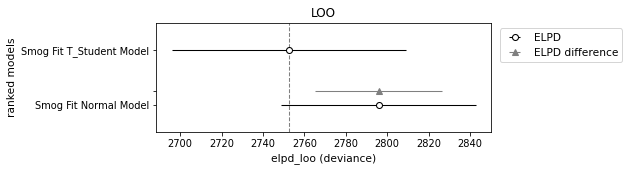

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Smog Fit T_Student Model,0,2752.450037,12.280067,0.00000,0.680646,56.579885,0.000000,False,deviance
Smog Fit Normal Model,1,2795.846298,6.434565,43.39626,0.319354,46.937896,30.765342,False,deviance


In [136]:
model_comparison = az.compare(model_dict, ic="loo", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()
model_comparison.head()

                          rank    elpd_waic     p_waic  elpd_diff    weight  \
Smog Fit T_Student Model     0  2752.221707  12.165902   0.000000  0.681015   
Smog Fit Normal Model        1  2795.801565   6.412198  43.579859  0.318985   

                                 se        dse  warning     scale  
Smog Fit T_Student Model  56.570778   0.000000    False  deviance  
Smog Fit Normal Model     46.950066  30.771421     True  deviance  


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


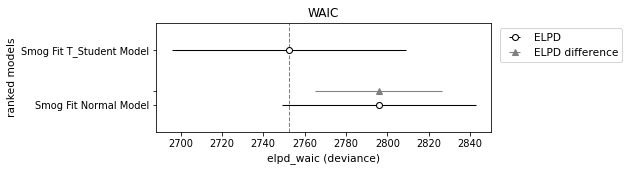

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
Smog Fit T_Student Model,0,2752.221707,12.165902,0.000000,0.681015,56.570778,0.000000,False,deviance
Smog Fit Normal Model,1,2795.801565,6.412198,43.579859,0.318985,46.950066,30.771421,True,deviance


In [137]:
model_comparison = az.compare(model_dict, ic="waic", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()
model_comparison.head()

## LOO/WAIC for smog in Swoszowice

In [132]:
fit_normal = az.from_cmdstanpy(posterior=fit_sw, posterior_predictive = 'smog_hat', observed_data = {'smog': df_sw["smog Swoszowice"]})
fit_student= az.from_cmdstanpy(posterior=fit_sw_s, posterior_predictive = 'smog_hat', observed_data = {'smog': df_sw["smog Swoszowice"]})

model_dict = {"Smog Fit Normal Model": fit_normal, "Smog Fit T_Student Model": fit_student}

                          rank     elpd_loo      p_loo  elpd_diff    weight  \
Smog Fit T_Student Model     0  2752.450037  12.280067    0.00000  0.680646   
Smog Fit Normal Model        1  2795.846298   6.434565   43.39626  0.319354   

                                 se        dse  warning     scale  
Smog Fit T_Student Model  56.579885   0.000000    False  deviance  
Smog Fit Normal Model     46.937896  30.765342    False  deviance  


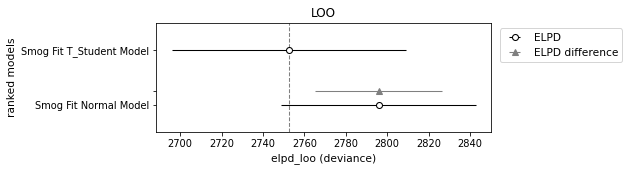

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Smog Fit T_Student Model,0,2752.450037,12.280067,0.00000,0.680646,56.579885,0.000000,False,deviance
Smog Fit Normal Model,1,2795.846298,6.434565,43.39626,0.319354,46.937896,30.765342,False,deviance


In [138]:
model_comparison = az.compare(model_dict, ic="loo", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()
model_comparison.head()

                          rank    elpd_waic     p_waic  elpd_diff    weight  \
Smog Fit T_Student Model     0  2752.221707  12.165902   0.000000  0.681015   
Smog Fit Normal Model        1  2795.801565   6.412198  43.579859  0.318985   

                                 se        dse  warning     scale  
Smog Fit T_Student Model  56.570778   0.000000    False  deviance  
Smog Fit Normal Model     46.950066  30.771421     True  deviance  


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


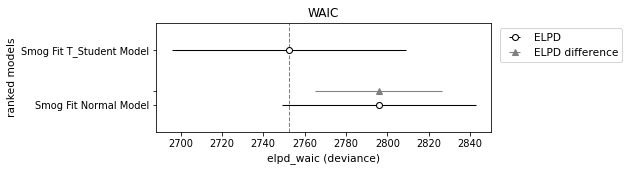

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
Smog Fit T_Student Model,0,2752.221707,12.165902,0.000000,0.681015,56.570778,0.000000,False,deviance
Smog Fit Normal Model,1,2795.801565,6.412198,43.579859,0.318985,46.950066,30.771421,True,deviance


In [139]:
model_comparison = az.compare(model_dict, ic="waic", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()
model_comparison.head()